In [26]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import check_util.checker as checker 
from IPython.display import clear_output

import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))

tensorflow version: 2.0.0
GPU 사용 가능 여부: False


In [27]:
batch_size = 128
max_epochs = 5
learning_rate = 0.001
num_classes = 10

In [28]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape([-1, 28 * 28])
train_data = train_data.astype(np.float32)
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape([-1, 28 * 28])
test_data = test_data.astype(np.float32)
test_labels = test_labels.astype(np.int32)

In [29]:
# tf.data.Dataset 만드는 간단한 예제
temp_dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4])
temp_dataset = temp_dataset.shuffle(100)
temp_dataset = temp_dataset.batch(2)
temp_dataset = temp_dataset.repeat(3)

In [30]:
# 실제 data를 추출하는 과정
for epoch in range(3):
    count = 0 # 무한루프 방지용
    for step, data in enumerate(temp_dataset):
        print("epoch: {}  step: {}  data: {}".format(
              epoch+1, step+1, data))
        count += 1
        if count > 10:
            break

epoch: 1  step: 1  data: [4 1]
epoch: 1  step: 2  data: [2 3]
epoch: 1  step: 3  data: [3 2]
epoch: 1  step: 4  data: [1 4]
epoch: 1  step: 5  data: [3 2]
epoch: 1  step: 6  data: [4 1]
epoch: 2  step: 1  data: [1 2]
epoch: 2  step: 2  data: [3 4]
epoch: 2  step: 3  data: [2 4]
epoch: 2  step: 4  data: [3 1]
epoch: 2  step: 5  data: [2 4]
epoch: 2  step: 6  data: [3 1]
epoch: 3  step: 1  data: [2 1]
epoch: 3  step: 2  data: [3 4]
epoch: 3  step: 3  data: [4 2]
epoch: 3  step: 4  data: [1 3]
epoch: 3  step: 5  data: [3 4]
epoch: 3  step: 6  data: [2 1]


In [31]:
# for train
N = len(train_data)

## 코드 시작 ##
train_dataset = tf.data.Dataset.from_tensor_slices((train_data,train_labels))
train_dataset = train_dataset.shuffle(N)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.repeat(3)
## 코드 종료 ##

print(train_dataset)

# for test
## 코드 시작 ##
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,test_labels))
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat(3)
## 코드 종료 ##

print(test_dataset)

<RepeatDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int32)>
<RepeatDataset shapes: ((None, 784), (None,)), types: (tf.float32, tf.int32)>


In [32]:
checker.train_dataset_check(train_dataset)
checker.test_dataset_check(test_dataset)

train_dataset을 잘 구현하셨습니다! 이어서 진행하셔도 좋습니다.
test_dataset을 잘 구현하셨습니다! 이어서 진행하셔도 좋습니다.


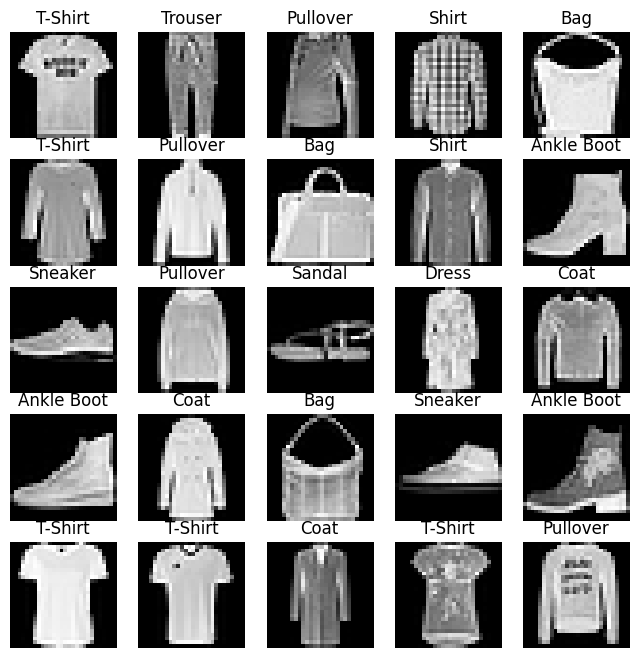

In [33]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns*rows+1):
    data_idx = np.random.randint(len(train_data))
    img = train_data[data_idx].reshape([28, 28])
    label = labels_map[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()

In [34]:
model = tf.keras.Sequential() # Sequential 모델 생성

In [35]:
## 코드 시작 ##
model.add(tf.keras.layers.Dense(512, input_shape=(28*28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.ReLU())
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
## 코드 종료 ##

In [36]:
checker.model_check(model)

네트워크를 잘 구현하셨습니다! 이어서 진행하셔도 좋습니다.


In [37]:
for images, labels in train_dataset.take(1):
    print("predictions: ", model(images[0:3]))

predictions:  tf.Tensor(
[[0.09210347 0.14158605 0.10163052 0.17321984 0.10271877 0.09654738
  0.03225963 0.07624107 0.0672259  0.11646742]
 [0.1137282  0.11511104 0.09260353 0.10275365 0.08777262 0.13094069
  0.04282938 0.07239696 0.08004294 0.16182095]
 [0.08736801 0.21214207 0.09624238 0.1337748  0.07795702 0.06794436
  0.03414126 0.0899717  0.04932188 0.1511366 ]], shape=(3, 10), dtype=float32)


In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 409,098
Trainable params: 408,074
Non-trainable params: 1,024
_________________________________________________________________


In [39]:
# model compile with optimizer, loss, metrics

## 코드 시작 ##
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
## 코드 종료 ##

In [40]:
checker.compile_check(model)

compile을 잘 정의하셨습니다! 이어서 진행하셔도 좋습니다.


In [53]:
## 코드 시작 ##
model.fit(train_data,train_labels,epochs=max_epochs)
## 코드 종료 ##

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3189 - accuracy: 0.8842
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2721 - accuracy: 0.8995
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2529 - accuracy: 0.9074
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2361 - accuracy: 0.9118
Epoch 5/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2258 - accuracy: 0.9163


In [54]:
checker.accuracy_check(model)

fit을 잘 정의하셨습니다! 이어서 진행하셔도 좋습니다.


In [55]:
loss,accuracy = model.evaluate(test_dataset, steps = len(test_data)//batch_size)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(accuracy))

78/78 [==============================] - 0s 2ms/step - loss: 0.3675 - accuracy: 0.8810
test loss is 0.3675063512264154
test accuracy is 0.8810096383094788


In [56]:
checker.test_check(model)

모델 성능이 기준치를 넘었습니다! 이어서 진행하셔도 좋습니다.


In [57]:
model.predict(tf.reshape(images[0], (1,-1)))

array([[4.0054961e-06, 1.9969995e-09, 1.4810730e-04, 8.2154293e-06,
        5.4443171e-03, 2.3246378e-09, 9.9439478e-01, 1.9251727e-08,
        6.4705500e-07, 2.7890916e-09]], dtype=float32)

In [58]:
model(tf.reshape(images[0], (1,-1)), training = False)

<tf.Tensor: id=66460, shape=(1, 10), dtype=float32, numpy=
array([[4.0054961e-06, 1.9969995e-09, 1.4810730e-04, 8.2154293e-06,
        5.4443171e-03, 2.3246378e-09, 9.9439478e-01, 1.9251727e-08,
        6.4705500e-07, 2.7890916e-09]], dtype=float32)>

In [59]:
model(tf.reshape(images[0], (1,-1)))

<tf.Tensor: id=66491, shape=(1, 10), dtype=float32, numpy=
array([[4.0054961e-06, 1.9969995e-09, 1.4810730e-04, 8.2154293e-06,
        5.4443171e-03, 2.3246378e-09, 9.9439478e-01, 1.9251727e-08,
        6.4705500e-07, 2.7890916e-09]], dtype=float32)>

In [60]:
model(tf.reshape(images[0], (1,-1)), training = True)

<tf.Tensor: id=66536, shape=(1, 10), dtype=float32, numpy=
array([[0.09968396, 0.08008803, 0.11277547, 0.10373472, 0.10373193,
        0.06147031, 0.11942587, 0.10030323, 0.11244255, 0.10634389]],
      dtype=float32)>

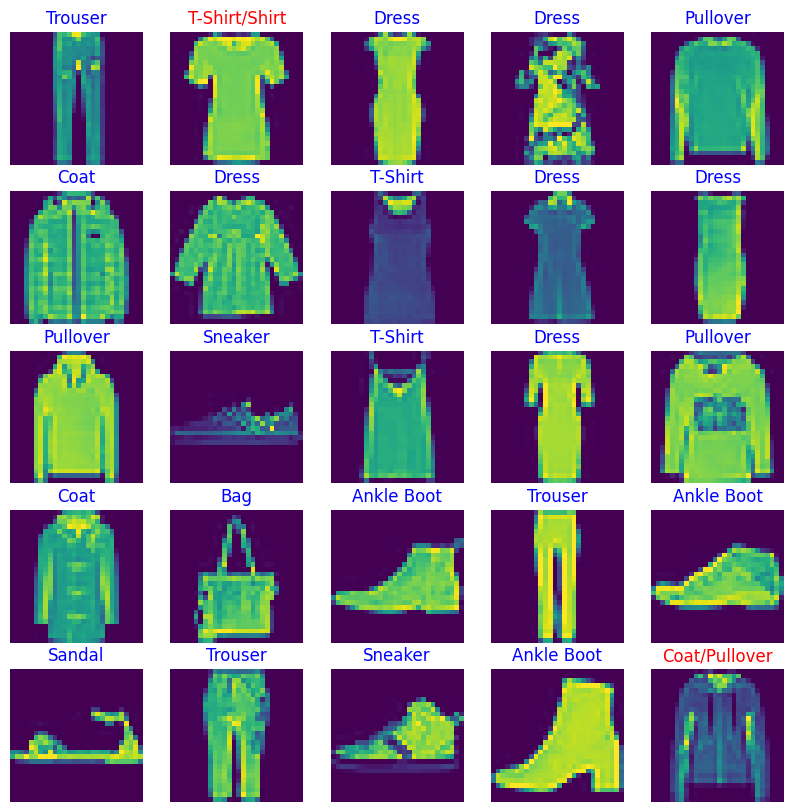

In [61]:
test_batch_size = 25
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')